In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/Users/apple/Desktop/python side project/Machine learning/E-commerce churn analysis/E-commerce data.csv')
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 資料介紹

### 欄位說明

>CustomerID：客戶唯一識別碼  
>Churn：流失標記（是否流失）  
>Tenure：客戶使用該產品時間  
>PreferredLoginDevice：客戶偏好的登入裝置  
>CityTier：城市等級（城市階層）  
>WarehouseToHome：倉庫到客戶住家的距離  
>PreferredPaymentMode：客戶偏好的付款方式  
>Gender：客戶性別  
>HourSpendOnApp：客戶在網站或App上的平均使用時數  
>NumberOfDeviceRegistered：客戶註冊的裝置數量  
>PreferedOrderCat：客戶上個月偏好的訂購類別  
>SatisfactionScore：客戶對服務的滿意度評分  
>NumberOfAddress：客戶新增的地址數量  
>Complain：客戶上個月是否有提出投訴  
>OrderAmountHikeFromlastYear：訂單金額相較去年成長的百分比  
>CouponUsed：上個月使用的優惠券數量  
>OrderCount：上個月下單的總次數  
>DaySinceLastOrder：距離客戶上次下單的天數  
>CashbackAmount：上個月獲得的平均現金回饋金額  

### 目標

<div style="border-left: 5px solid green; padding: 10px; background-color: #d4edda; color: #155724;">
    <b>根據提供欄位預測顧客是否會流失</b> 
</div>

# 探索性資料分析

### 檢查Null值

In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

> #分析重點  
> 部分欄位有缺失值，所以我們稍後會要填補這些資料

### 調整某些欄位內容

In [5]:
# 修改 PreferredLoginDevice 欄位，將Phone ＆ Mobile Phone名稱統一
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

# 修改 PreferedOrderCat 欄位，將Mobile ＆ Mobile Phone名稱統一
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

### 查看各類別欄位流失率

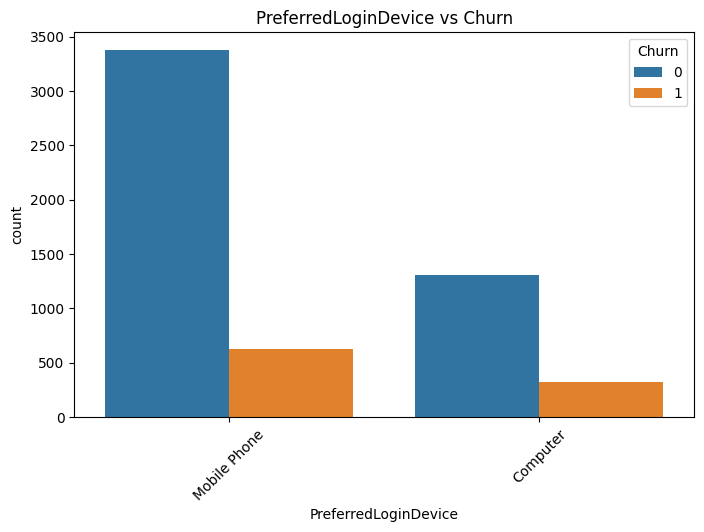

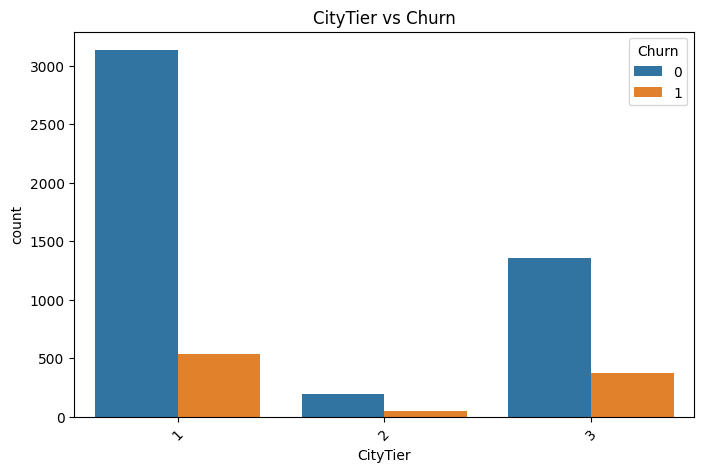

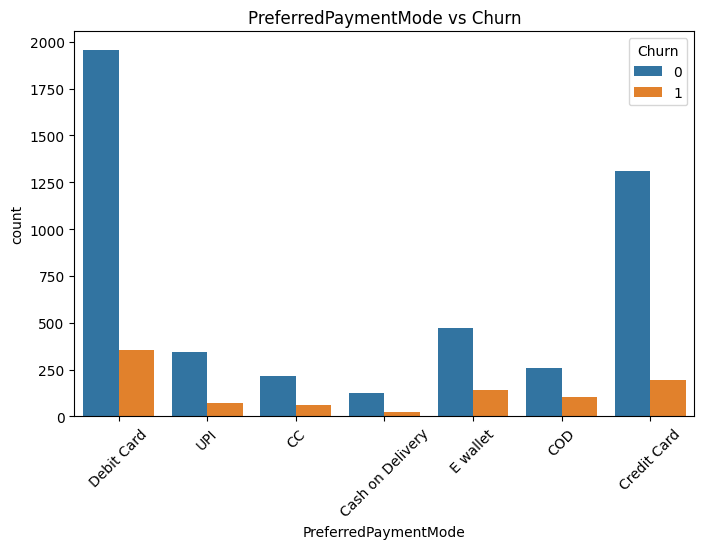

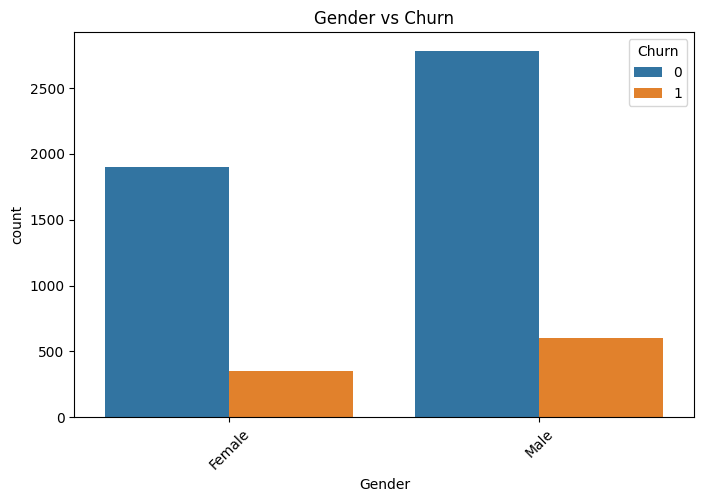

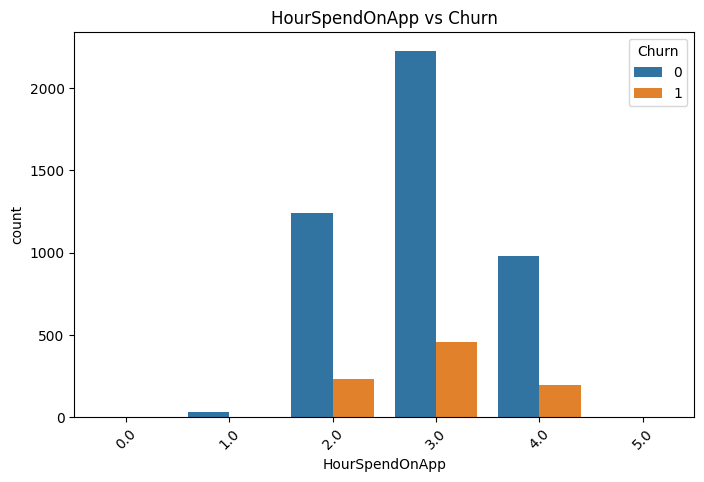

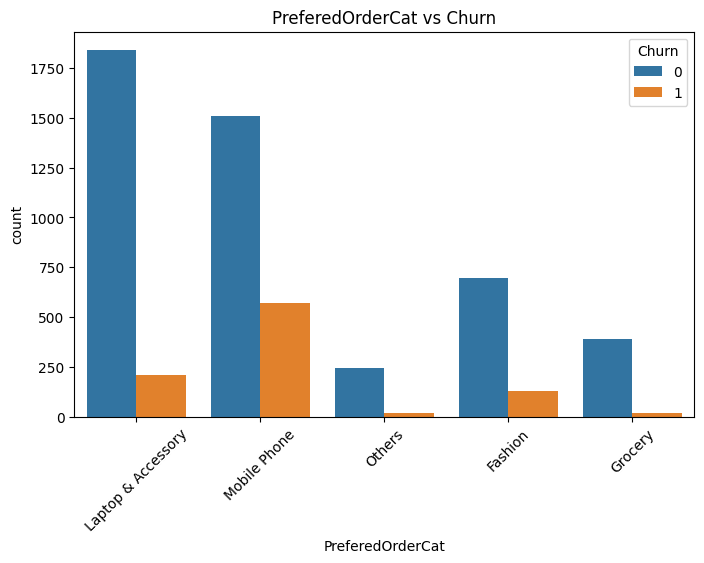

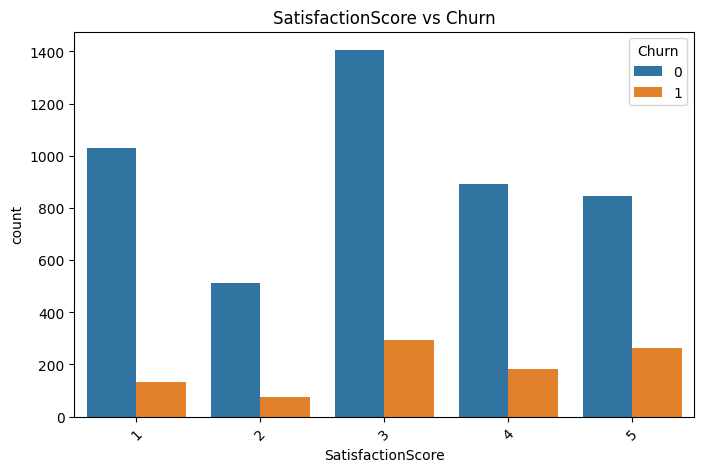

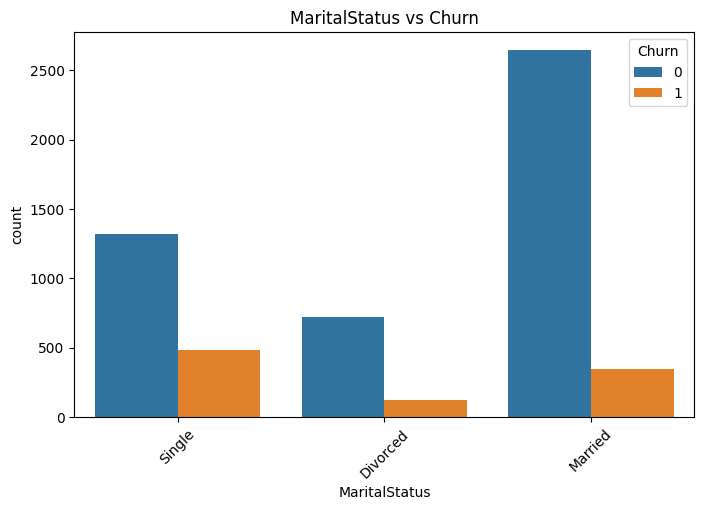

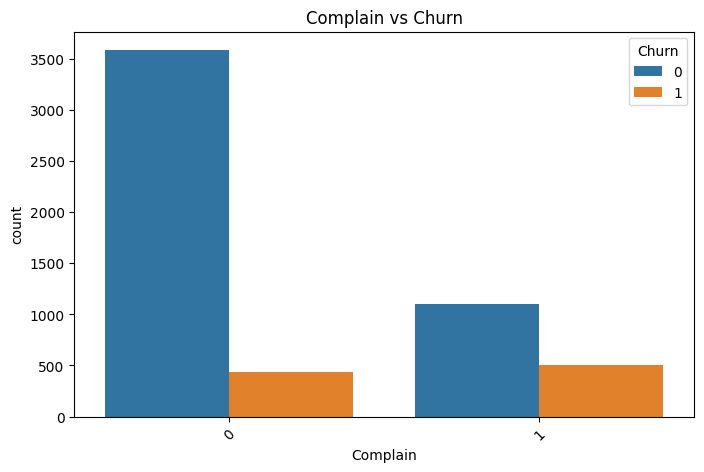

In [26]:
categorical_cols = [
    'PreferredLoginDevice',
    'CityTier',
    'PreferredPaymentMode',
    'Gender',
    'HourSpendOnApp',
    'PreferedOrderCat',
    'SatisfactionScore',
    'MaritalStatus',
    'Complain'
]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

> #分析重點
> 1. 有超過一半用戶數使用手機來操作  
> 2. 大多數用戶聚集於City Tier 1，而City Tier 3的用戶有較高的流失率 
> 3. 大多數用戶使用Debit Card付款
> 4. 男性用戶數略高於女性
> 5. 大多數用戶上個月的使用時間為3hr
> 6. 筆電及相關周邊商品為較熱門商品類別
> 7. 單身用戶有較高的流失率
> 8. 過去一個月有抱怨過的用戶流失率較高

### 查看各數值欄位與流失率關聯

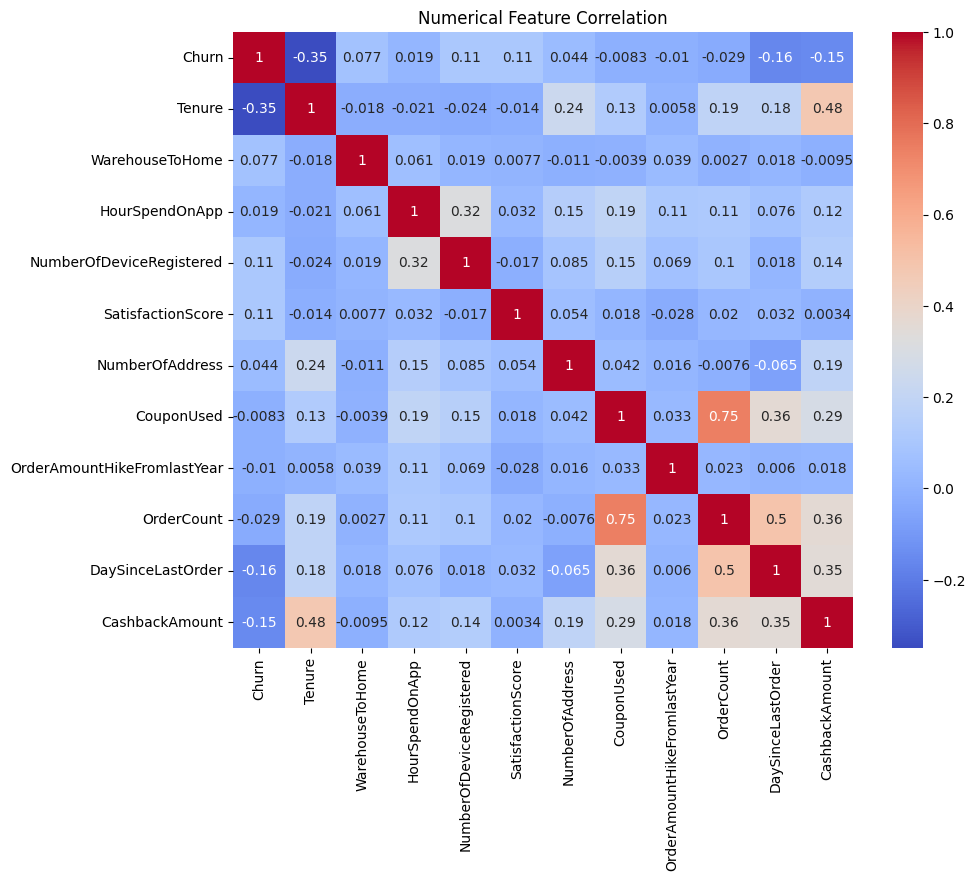

In [8]:
# Your numerical columns
numerical_cols = [
    'Churn',
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'SatisfactionScore',
    'NumberOfAddress',
    'CouponUsed',
    'OrderAmountHikeFromlastYear',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

corr = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numerical Feature Correlation')
plt.show()

> #分析重點
> 1. 用戶在平台上的活躍時長(Tenure)與流失率有較高關聯性
> 2. 上個月訂單數(OrderCount)與優惠卷使用數(CouponUsed)有高度正相關，為避免多重共線性，後面特徵工程部分會將與流失率關聯較低欄位(優惠卷使用數)刪除

### 各性別喜歡買的商品類別

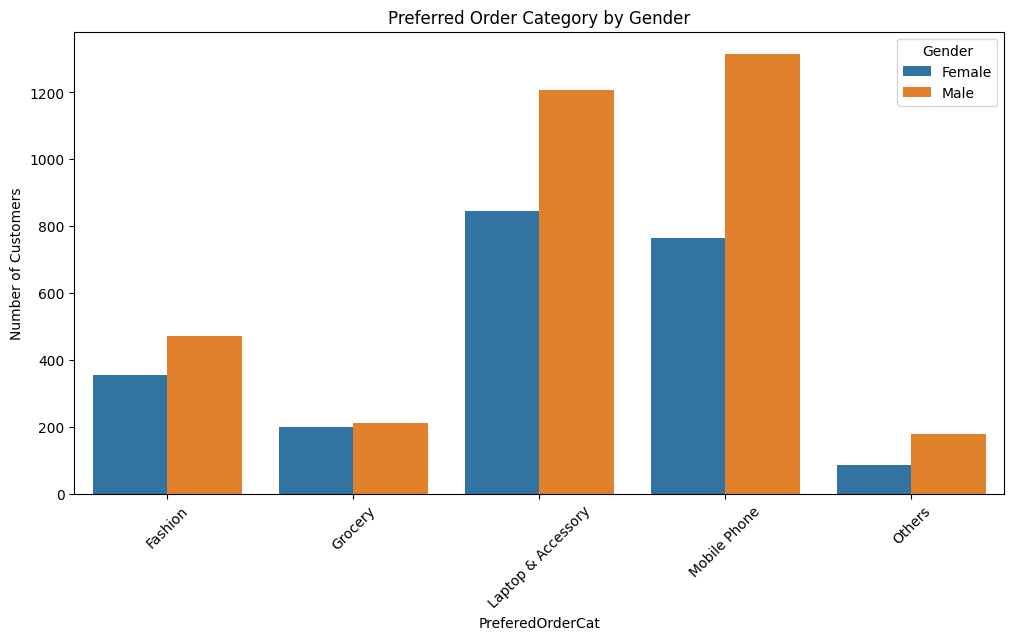

In [10]:
gender_ordercat = pd.crosstab(df['Gender'], df['PreferedOrderCat'])

gender_ordercat_long = gender_ordercat.reset_index().melt(id_vars='Gender', var_name='PreferedOrderCat', value_name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=gender_ordercat_long, x='PreferedOrderCat', y='Count', hue='Gender')
plt.title('Preferred Order Category by Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

> #分析重點
> 1. 男生最喜歡的商品類別為手機(Mobile Phone)
> 2. 女生最喜歡的商品類別則是筆電及相關周邊(Laptop & Accessory)

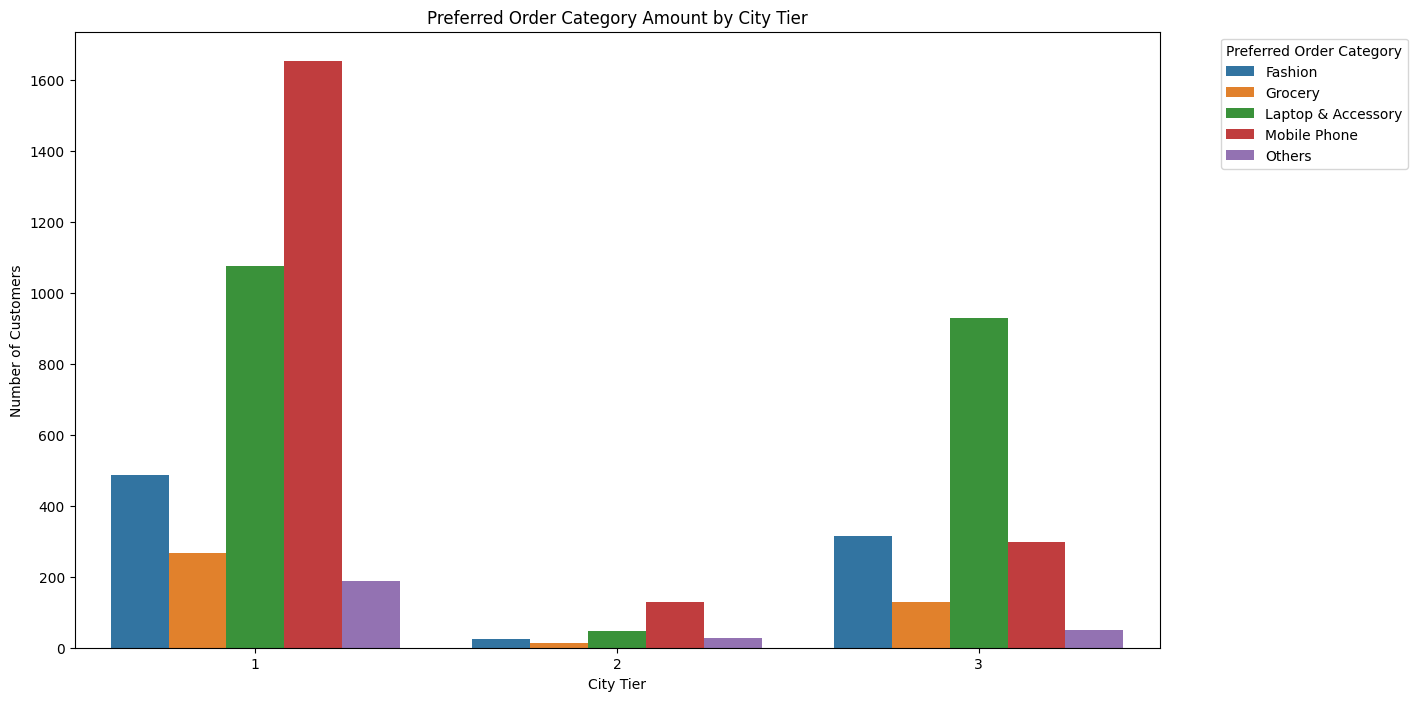

In [29]:
city_ordercat = pd.crosstab(df['CityTier'], df['PreferedOrderCat'])

city_ordercat_melted = city_ordercat.reset_index().melt(id_vars='CityTier', var_name='PreferedOrderCat', value_name='Count')

plt.figure(figsize=(14,8))
sns.barplot(data=city_ordercat_melted, x='CityTier', y='Count', hue='PreferedOrderCat')
plt.title('Preferred Order Category Amount by City Tier')
plt.ylabel('Number of Customers')
plt.xlabel('City Tier')
plt.legend(title='Preferred Order Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> #分析重點
> 1. City Tier 1 & 2最熱門的商品類別為手機(Mobile Phone)
> 2. City Tier 3 最熱門的商品類別為筆電及週邊(Laptop & Accessory)

# 特徵工程

### 填補缺失值

> 我們會使用IterativeImputer來進行各欄位的缺失值填補，這個步驟將會在後面模型建立部分的pipeline中自動處理

### 類別型欄位進行one hot encode

In [6]:
cat_data = df.select_dtypes(include='object')
encoded = pd.get_dummies(cat_data,drop_first=True)
df_enc = pd.concat([df.drop(cat_data.columns, axis=1), encoded], axis=1)

### 刪除不重要欄位

In [7]:
df_enc_drop = df_enc.drop(['CustomerID','CouponUsed'],axis=1)

# 模型建立

### 將資料分成測試集及訓練集

In [8]:
X_fe = df_enc_drop.drop(columns=['Churn']) 
y_fe = df_enc_drop['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

### 使用IterativeImputer來填補缺失值

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 只用 train 的資料來 fit
imputer = IterativeImputer(random_state=42)
imputer.fit(X_train) 

# 用訓練出來的 imputer，分別 transform
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

### 數值型欄位進行標準化

In [10]:
from sklearn.preprocessing import StandardScaler

num_cols=[
    'WarehouseToHome',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### 因資料中的流失值(Churn)極度不平衡(流失者數量遠低於留存數量)，因此使用SMOTETomek來進行過取樣(Over Sampling)

In [11]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

### Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

log_reg = LogisticRegression(max_iter=10000, solver='saga')

param_dist_logreg = {
    'C': np.logspace(-4, 4, 20),   # 正則化強度
    'penalty': ['l1', 'l2']
}

random_search_logreg = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist_logreg,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search_logreg.fit(X_train, y_train)
print("Best Logistic Regression:", random_search_logreg.best_params_)

# 1. 拿最佳模型
best_logreg = random_search_logreg.best_estimator_

# 2. 預測 test 資料
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:,1]  # 取出預測的機率（給 AUC 用）

# 3. 計算指標
y_train_pred = best_logreg.predict(X_train)
y_train_pred_proba = best_logreg.predict_proba(X_train)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_pred_proba))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Logistic Regression: {'penalty': 'l2', 'C': np.float64(0.615848211066026)}
Logistic Regression Test Results:
Accuracy: 0.8259
ROC AUC: 0.8963

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89       941
           1       0.48      0.84      0.61       185

    accuracy                           0.83      1126
   macro avg       0.72      0.83      0.75      1126
weighted avg       0.88      0.83      0.84      1126



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search_rf.fit(X_train, y_train)
print("Best Random Forest:", random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:,1]

y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_pred_proba))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Train Accuracy: 0.9979946524064172
Train ROC AUC: 0.9999910635133975
Random Forest Test Results:
Accuracy: 0.9645
ROC AUC: 0.9827

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       941
           1       0.95      0.83      0.88       185

    accuracy                           0.96      1126
   macro avg       0.96      0.91      0.93      1126
weighted avg       0.96      0.96      0.96      1126



### XGBoost

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)
print("Best XGBoost:", random_search_xgb.best_params_)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_pred_proba))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': np.float64(0.042222222222222223), 'colsample_bytree': 0.6}
Train Accuracy: 0.9979946524064172
Train ROC AUC: 0.9999910635133975
Test Accuracy: 0.9822
Test ROC AUC: 0.9837

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       941
           1       0.97      0.92      0.94       185

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126



### MLP

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=5000)

param_dist_mlp = {
    'hidden_layer_sizes': [(20,), (40,), (20,20)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 正則化
    'learning_rate_init': [0.001, 0.01, 0.1]
}

random_search_mlp = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist_mlp,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search_mlp.fit(X_train, y_train)
print("Best MLP:", random_search_mlp.best_params_)

best_mlp = random_search_mlp.best_estimator_
y_pred_mlp = best_mlp.predict(X_test)
y_pred_proba_mlp = best_mlp.predict_proba(X_test)[:,1]
y_train_pred = best_rf.predict(X_train)
y_train_pred_proba = best_rf.predict_proba(X_train)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train, y_train_pred_proba))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, y_pred_proba_mlp):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best MLP: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (40,), 'alpha': 0.0001, 'activation': 'tanh'}
Train Accuracy: 0.9979946524064172
Train ROC AUC: 0.9999910635133975
Test Accuracy: 0.9849
Test ROC AUC: 0.9970

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       941
           1       0.96      0.95      0.95       185

    accuracy                           0.98      1126
   macro avg       0.98      0.97      0.97      1126
weighted avg       0.98      0.98      0.98      1126



### 檢查模型是否有data leakage（若AUC約等於50，代表沒有data leakage）

In [25]:
# 打亂 y_train 和 y_test
y_train_shuffled = np.random.permutation(y_train)
y_test_shuffled = np.random.permutation(y_test)

# 再訓練你的 MLP 或其他模型
random_search_mlp.fit(X_train, y_train_shuffled)

y_pred_proba = random_search_mlp.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test_shuffled, y_pred_proba)
print(f"Shuffled Test AUC: {auc_score}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Shuffled Test AUC: 0.4999253238360571


<div style="border-left: 5px solid green; padding: 10px; background-color: #d4edda; color: #155724;">
    <b>結論： </b> 因在流失率分析中，我們較在意recall（漏網率），我們不希望漏掉真正會流失的客戶，所以選擇recall最高的模型MLP當作最後模型
</div>

<div style="border-left: 5px solid red; padding: 10px; background-color:rgb(237, 212, 212); color:rgb(87, 21, 21);">
    <b>延伸應用：</b><br><br>
    1. 客製化行銷<br>
    針對即將流失客戶，設計客製化行銷活動 ex.專屬折扣券、客製化推薦商品。<br><br>
    2. 登入提醒<br>
    可搭配限時折扣、登入即送獎勵等激勵手段激活即將流失顧客<br><br>
</div>